## Aufgabe 2

In [4]:
#Pakete
from skimage.io import imread
from skimage.filters import gaussian,laplace,sobel
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

### Aufgabe 2.1

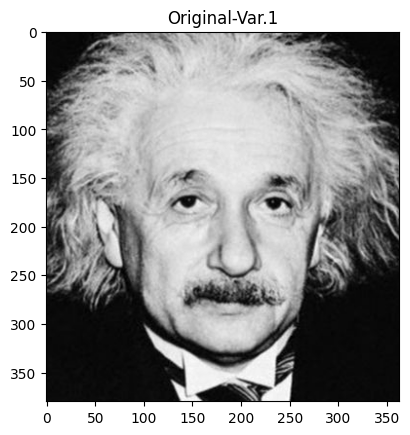

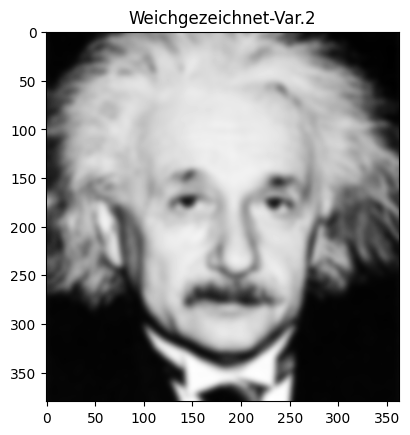

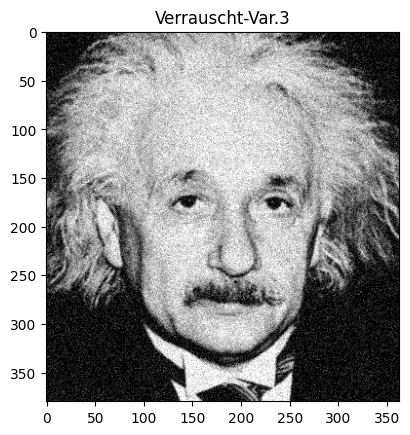

In [5]:
img=imread('./bilder-Wk09/einstein.png')/255
smoothingImg=gaussian(img,3)
noisyImg=random_noise(img,'gaussian',var=0.01)

plt.figure(1)
plt.title('Original-Var.1')
plt.imshow(img,cmap='gray')

plt.figure(2)
plt.title('Weichgezeichnet-Var.2')
plt.imshow(smoothingImg,cmap='gray')

plt.figure(3)
plt.title('Verrauscht-Var.3')
plt.imshow(noisyImg,cmap='gray')